<a href="https://colab.research.google.com/github/LM1997610/NN/blob/main/HW_1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [26]:
(train_images, train_labels),(val_x, val_y), (test_images, test_labels) = tfds.load("cifar", split=["train[]"], batch_size = 300)

NameError: ignored

In [27]:
a,b, c = tfds.load("cifar10", split=["train[0:49000]", "train[49000:]", "test"], as_supervised=True, batch_size = 300)

In [3]:
train_images = tf.cast(train_images, tf.float32)/ 255.0
test_images = tf.cast(test_images, tf.float32)/ 255.0

In [28]:
def add_conv_block(model, n_filters):

  model.add(keras.layers.Conv2D(filters = n_filters,                  # conv_layer
                                kernel_size = (3, 3),
                                padding = "same"))

  model.add(keras.layers.BatchNormalization())                       # batch_normalization
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))  # pool_layer
  model.add(keras.layers.Activation('relu'))                         # activation
  model.add(keras.layers.Dropout(0.3))                               # drop_out

  return model

In [29]:
hidden_layers =  [128, 256, 512, 512, 512]

model = keras.Sequential()

for i in hidden_layers:
  model = add_conv_block(model, i)

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10))


In [30]:
model.build(input_shape=(256, 32,32,3))
# model.summary()

In [34]:
cross_entropy = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = keras.metrics.SparseCategoricalAccuracy()
opt = keras.optimizers.Adam(learning_rate=0.0001, weight_decay=0.001)

In [35]:
callb = [tf.keras.callbacks.TerminateOnNaN(),
         #tf.keras.callbacks.EarlyStopping( patience=5, restore_best_weights=True, verbose=1),
         tf.keras.callbacks.TensorBoard(log_dir="logs", update_freq = 50 )]

In [ ]:
model.compile(optimizer= opt,
              loss = cross_entropy,
              metrics = accuracy)

history = model.fit(a, epochs=25, validation_data=b, callbacks=callb )

Epoch 1/25
164/164 [==============================] - 20s 100ms/step - loss: 1.5384 - sparse_categorical_accuracy: 0.4321 - val_loss: 2.2660 - val_sparse_categorical_accuracy: 0.2650
Epoch 2/25
164/164 [==============================] - 16s 100ms/step - loss: 1.3449 - sparse_categorical_accuracy: 0.5083 - val_loss: 2.4527 - val_sparse_categorical_accuracy: 0.2720
Epoch 3/25
164/164 [==============================] - 16s 98ms/step - loss: 1.2220 - sparse_categorical_accuracy: 0.5596 - val_loss: 2.3063 - val_sparse_categorical_accuracy: 0.3290
Epoch 4/25
164/164 [==============================] - 16s 97ms/step - loss: 1.1334 - sparse_categorical_accuracy: 0.5920 - val_loss: 2.0595 - val_sparse_categorical_accuracy: 0.3810
Epoch 5/25
164/164 [==============================] - 16s 98ms/step - loss: 1.0637 - sparse_categorical_accuracy: 0.6180 - val_loss: 1.9358 - val_sparse_categorical_accuracy: 0.4050
Epoch 6/25
164/164 [==============================] - 16s 99ms/step - loss: 1.0067 - spa

In [10]:
test_loss, test_acc = model.evaluate(c, verbose=2)

313/313 - 2s - loss: 0.8110 - sparse_categorical_accuracy: 0.7346 - 2s/epoch - 8ms/step


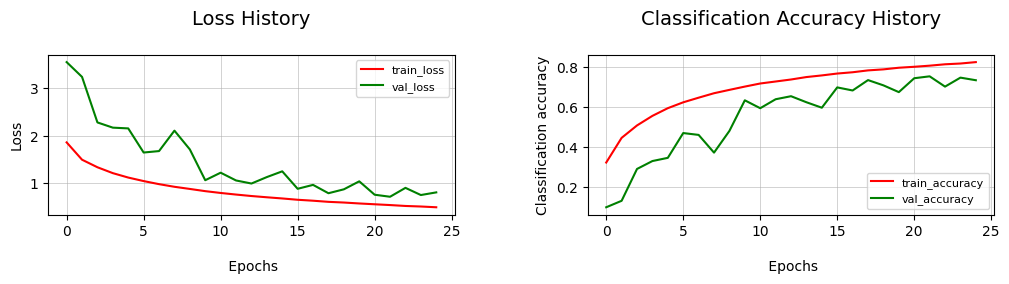

In [11]:

fig, ax = plt.subplots(1, 2, figsize=(11, 3))
fig.tight_layout(pad=4, w_pad = 6.5)

ax[0].plot(history.history['loss'], label='train_loss', color = "red")
ax[0].plot(history.history['val_loss'], label='val_loss', color = "green")

ax[0].set_title('Loss History\n', fontsize=14)
ax[0].set_xlabel('\n Epochs')
ax[0].set_ylabel('Loss')
#ax[0].set_xticks(list(range(1, num_epochs+1, 3)))
ax[0].grid(linewidth=0.4)
ax[0].legend(loc="best", prop={'size': 8})


ax[1].plot(history.history['sparse_categorical_accuracy'], label='train_accuracy', color = "red")
ax[1].plot(history.history['val_sparse_categorical_accuracy'], label = 'val_accuracy', color = "green")
ax[1].set_title('Classification Accuracy History\n', fontsize=14)
ax[1].set_xlabel('\n Epochs')
ax[1].set_ylabel('Classification accuracy')
ax[1].grid(linewidth=0.4)

#ax[1].set_xticks(list(range(1, num_epochs+1, 3)))
ax[1].legend(loc ="lower right", prop={'size': 8})

#plt.savefig("history_plot.png")
plt.show()

In [12]:
cifar10_class_names = {0: "Plane", 1: "Car", 2: "Bird", 3: "Cat", 4: "Deer",
                       5: "Dog", 6: "Frog", 7: "Horse", 8: "Boat", 9: "Truck"}

In [13]:
import numpy as np

In [14]:
def show_stuff(index, model):

  map = silency_map(test_images[index], model)

  last = test_images[index].numpy()[:,:,1] + map

  fig, ax = plt.subplots(1, 3, figsize=(5, 5))

  ax[1].axis('off')

  ax[0].imshow(test_images[index]);
  ax[0].axis('off')

  ax[1].imshow(map,alpha=0.8, cmap="jet")

  ax[2].imshow(last)
  #fig.colorbar(i)

  plt.show()

In [15]:
plt.imshow(test_images[2].numpy()[:,:,1] + map)

TypeError: ignored

In [ ]:
plt.imshow(test_images[2])

In [ ]:
def silency_map(image, model):

  with tf.GradientTape() as tape:

    tensor_input = tf.convert_to_tensor(np.expand_dims(image, axis=0))

    tape.watch(tensor_input)

    class_scores = model(tensor_input, training=False)
    predicted_class = np.argmax(class_scores)
    class_channel = class_scores[:,predicted_class]

  grads = tape.gradient(class_channel, tensor_input)
  dgrad_abs = tf.math.abs(grads)
  dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

  ## normalize to range between 0 and 1
  arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
  map = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

  return map, grads

In [ ]:
map, grads = silency_map(test_images[0], model)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,5))

axes[0].imshow(test_images[2])
i = axes[1].imshow(a,cmap="jet",alpha=0.8)
fig.colorbar(i)
